### LinearRegression

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
import mglearn

In [5]:
X,y=mglearn.datasets.make_wave(n_samples=500)  ##mglearn에있는 데이터셋의 makewave샘플을 500개가져옴

In [6]:
X.shape

(500, 1)

In [7]:
y.shape

(500,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [12]:
lr=LinearRegression().fit(X_train,y_train)

In [13]:
lr.coef_ ##y=w1x+w0     (W1)

array([0.46828404])

In [14]:
lr.intercept_ ##y=w1x+w0      (W0)

0.033475002734533854

### Determination of coefficient(R^2)

In [15]:
lr.score(X_train,y_train)

0.6684678090755989

In [16]:
lr.score(X_test,y_test)

0.6164683207580135

### Multiple Linear Regression

In [17]:
X,y = mglearn.datasets.load_extended_boston()

In [18]:
X.shape  ##N=506//d=104

(506, 104)

In [19]:
y.shape

(506,)

In [20]:
X_train, X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [21]:
lr=LinearRegression().fit(X_train,y_train)

In [22]:
lr.coef_.shapepe

(104,)

In [25]:
lr.score(X_train,y_train)

0.9520519609032729

In [26]:
lr.score(X_test,y_test)

0.6074721959665752

### Overfitting

#### N increases, or d decreases.... Overfitting issue overcomes...
Ridge regression method

In [27]:
from sklearn.linear_model import Ridge


In [28]:
clf=Ridge(alpha=1.0)

In [29]:
clf.fit(X_train,y_train)

Ridge()

In [30]:
clf.score(X_train,y_train)

0.885796658517094

In [31]:
clf.score(X_test,y_test)

0.7527683481744755

In [32]:
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
ridge1=Ridge(alpha=1).fit(X_train,y_train)
ridge10=Ridge(alpha=10).fit(X_train,y_train)

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

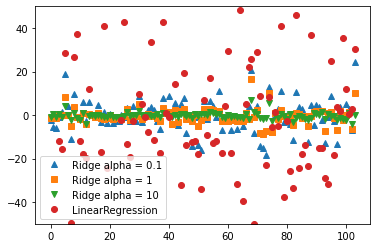

In [40]:
plt.plot(ridge01.coef_,"^",label="Ridge alpha = 0.1")
plt.plot(ridge1.coef_,"s",label="Ridge alpha = 1")
plt.plot(ridge10.coef_,"v",label="Ridge alpha = 10")
plt.plot(lr.coef_,"o",label="LinearRegression")
plt.ylim(-50,50)
plt.legend()

In [55]:
alphas=[]
train_results=[]
test_results=[]

In [56]:
for i in range(100):
    alpha=i*0.01
    Ridg=Ridge(alpha=alpha).fit(X_train,y_train)
    train_result=Ridg.score(X_train,y_train)
    test_result=Ridg.score(X_test,y_test)
    alphas.append(alpha)
    train_results.append(train_result)
    test_results.append(test_result)

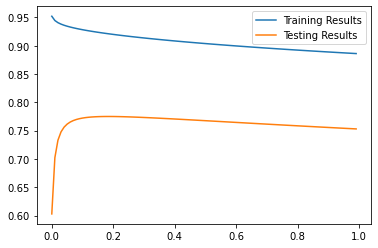

In [57]:
plt.plot(alphas,train_results,label="Training Results")
plt.plot(alphas,test_results,label="Testing Results")
plt.legend()

## LASSO

In [58]:
from sklearn.linear_model import Lasso

In [60]:
lasso=Lasso().fit(X_train,y_train)

In [61]:
lasso.score(X_train,y_train)

0.29323768991114607

In [62]:
lasso.score(X_test,y_test)

0.20937503255272294

In [63]:
import numpy as np

In [65]:
np.sum(lasso.coef_!=0)

4

In [66]:
lasso001=Lasso(alpha=0.01,max_iter=10000).fit(X_train,y_train)

In [67]:
lasso001.score(X_train,y_train)

0.8962226511086497

In [68]:
lasso001.score(X_test,y_test)

0.7656571174549983

In [69]:
np.sum(lasso001.coef_!=0)

33

In [70]:
lasso00001=Lasso(alpha=0.0001,max_iter=1000000).fit(X_train,y_train)

In [71]:
lasso00001.score(X_train,y_train)

0.9507158754515467

In [72]:
lasso00001.score(X_test,y_test)

0.6437467421272709

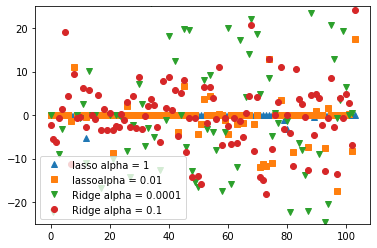

In [73]:
plt.plot(lasso.coef_,"^",label="lasso alpha = 1")
plt.plot(lasso001.coef_,"s",label="lassoalpha = 0.01")
plt.plot(lasso00001.coef_,"v",label="Ridge alpha = 0.0001")
plt.plot(ridge01.coef_,"o",label="Ridge alpha = 0.1")
plt.ylim(-25,25)
plt.legend()

## In_Class Homework

1) Call ElasticNet function from sklearn

2) Use three alpha (0.001,0.01,0.1,10)with a l1 (0.4)

3) Perform fitting with training data

4) plot to demonstrate which alpha is the best among four alphas

you need plot training and testing result with labels in the same figure. the figure should contain a legend.

In [88]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [89]:
ela=ElasticNet(alpha=1.0)

In [90]:
ela.fit(X_train,y_train)

ElasticNet()

In [91]:
ela.score(X_train,y_train)

0.32837814485847916

In [92]:
ela.score(X_test,y_test)

0.2217004367773664

In [123]:
alphas=[]
train_results=[]
test_results=[]

ela0001=ElasticNet(alpha=0.001,l1_ratio = 0.4,max_iter=10000).fit(X_train,y_train)
ela001=ElasticNet(alpha=0.01,l1_ratio = 0.4,max_iter=10000).fit(X_train,y_train)
ela01=ElasticNet(alpha=0.1,l1_ratio = 0.4,max_iter=10000).fit(X_train,y_train)
ela10=ElasticNet(alpha=10,l1_ratio = 0.4,max_iter=10000).fit(X_train,y_train)


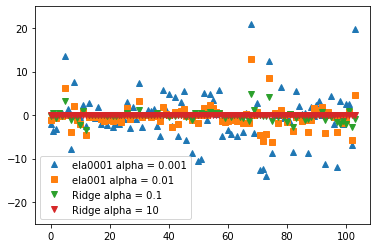

In [124]:
plt.plot(ela0001.coef_,"^",label="ela0001 alpha = 0.001")
plt.plot(ela001.coef_,"s",label="ela001 alpha = 0.01")
plt.plot(ela01.coef_,"v",label="Ridge alpha = 0.1")
plt.plot(ela10.coef_,"v",label="Ridge alpha = 10")
plt.ylim(-25,25)
plt.legend()

In [125]:
alpha=[0.001,0.01,0.1,10]
for i in alpha:
    Elastic=ElasticNet(i).fit(X_train,y_train)
    train_result=Elastic.score(X_train,y_train)
    test_result=Elastic.score(X_test,y_test)
    alphas.append(alpha)
    train_results.append(train_result)
    test_results.append(test_result)

C:\Users\home\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1442.5349688685483, tolerance: 3.233182126649077
  model = cd_fast.enet_coordinate_descent(


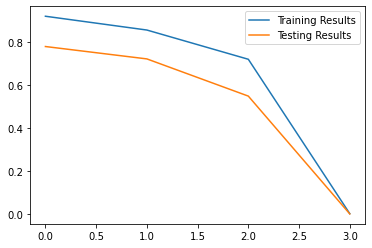

In [126]:
plt.plot(train_results,label="Training Results")
plt.plot(test_results,label="Testing Results")
plt.legend()